In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('Dataset/online_gaming_behavior_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()


Dataset Shape: (40034, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: f

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")
        print(f"Value counts for {col}:")
        print(df[col].value_counts())


Statistical Summary:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000

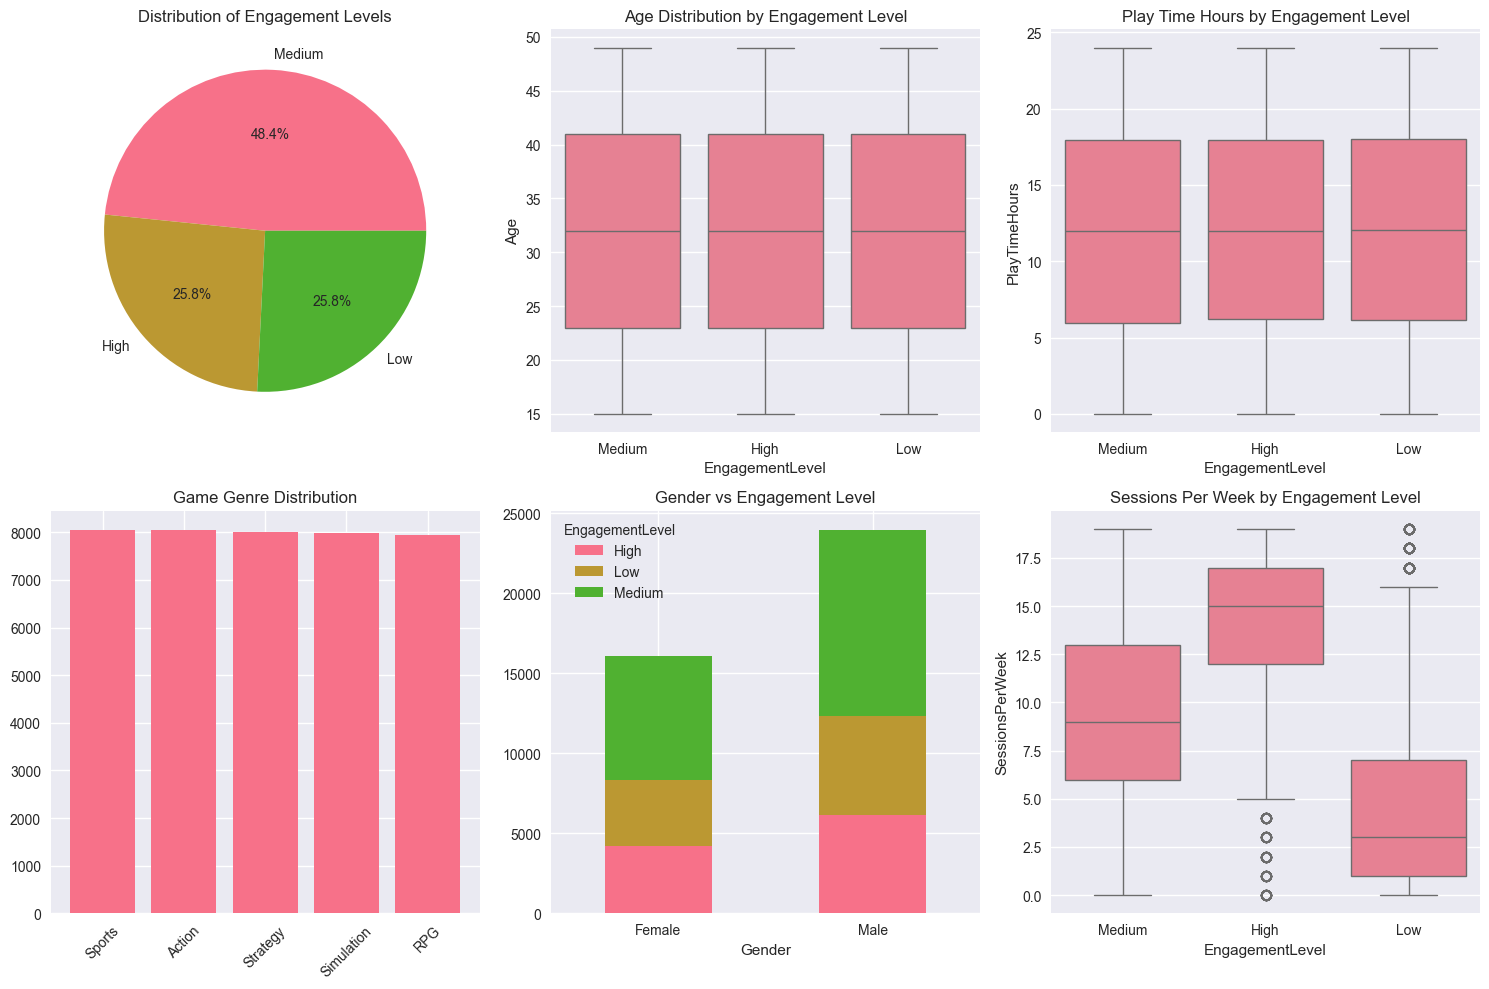

In [4]:
# Distribution of Engagement Level (Target Variable)
plt.figure(figsize=(15, 10))

# Engagement Level Distribution
plt.subplot(2, 3, 1)
engagement_counts = df['EngagementLevel'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Engagement Levels')

# Age Distribution by Engagement Level
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='EngagementLevel', y='Age')
plt.title('Age Distribution by Engagement Level')

# Play Time Hours by Engagement Level
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='EngagementLevel', y='PlayTimeHours')
plt.title('Play Time Hours by Engagement Level')

# Game Genre Distribution
plt.subplot(2, 3, 4)
genre_counts = df['GameGenre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Game Genre Distribution')
plt.xticks(rotation=45)

# Gender vs Engagement Level
plt.subplot(2, 3, 5)
gender_engagement = pd.crosstab(df['Gender'], df['EngagementLevel'])
gender_engagement.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender vs Engagement Level')
plt.xticks(rotation=0)

# Sessions Per Week by Engagement Level
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='EngagementLevel', y='SessionsPerWeek')
plt.title('Sessions Per Week by Engagement Level')

plt.tight_layout()
plt.show()


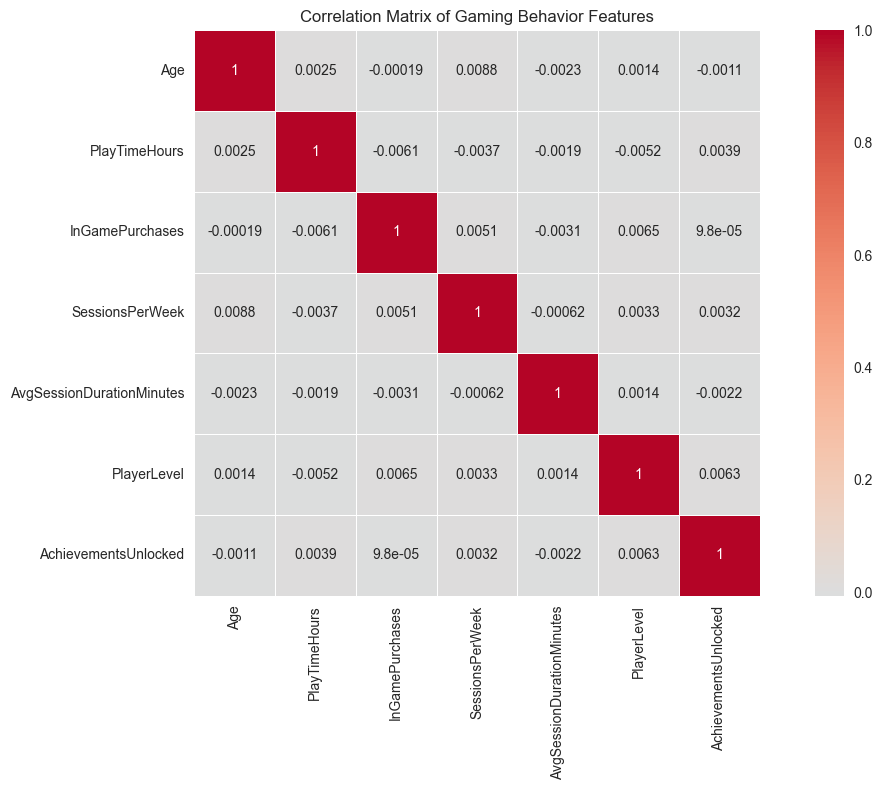

Strong correlations (|r| > 0.5):


In [5]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                  'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Gaming Behavior Features')
plt.tight_layout()
plt.show()

# Additional insights
print("Strong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")


In [6]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Remove PlayerID as it's just an identifier
df_processed = df_processed.drop('PlayerID', axis=1)

# Label encode categorical variables
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
    print(f"{feature} encoding mapping:")
    for i, label in enumerate(le.classes_):
        print(f"  {label}: {i}")
    print()

# Encode target variable (EngagementLevel)
target_encoder = LabelEncoder()
df_processed['EngagementLevel_encoded'] = target_encoder.fit_transform(df_processed['EngagementLevel'])

print("Target variable encoding:")
for i, label in enumerate(target_encoder.classes_):
    print(f"  {label}: {i}")

# Select features for modeling
feature_columns = (['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                   'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'] + 
                  [f + '_encoded' for f in categorical_features])

X = df_processed[feature_columns]
y = df_processed['EngagementLevel_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_columns}")


Gender encoding mapping:
  Female: 0
  Male: 1

Location encoding mapping:
  Asia: 0
  Europe: 1
  Other: 2
  USA: 3

GameGenre encoding mapping:
  Action: 0
  RPG: 1
  Simulation: 2
  Sports: 3
  Strategy: 4

GameDifficulty encoding mapping:
  Easy: 0
  Hard: 1
  Medium: 2

Target variable encoding:
  High: 0
  Low: 1
  Medium: 2

Feature matrix shape: (40034, 11)
Target vector shape: (40034,)

Features used: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting target distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training set shape: (32027, 11)
Testing set shape: (8007, 11)
Training target distribution:
EngagementLevel_encoded
0     8269
1     8259
2    15499
Name: count, dtype: int64

Testing target distribution:
EngagementLevel_encoded
0    2067
1    2065
2    3875
Name: count, dtype: int64


In [8]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

# Train the model
print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Random Forest Classifier...
Training completed!

Model Accuracy: 0.9098
Cross-validation scores: [0.91617234 0.90399625 0.91288056 0.90913349 0.91147541]
Mean CV score: 0.9107 (+/- 0.0081)


Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2067
         Low       0.91      0.88      0.89      2065
      Medium       0.91      0.95      0.93      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



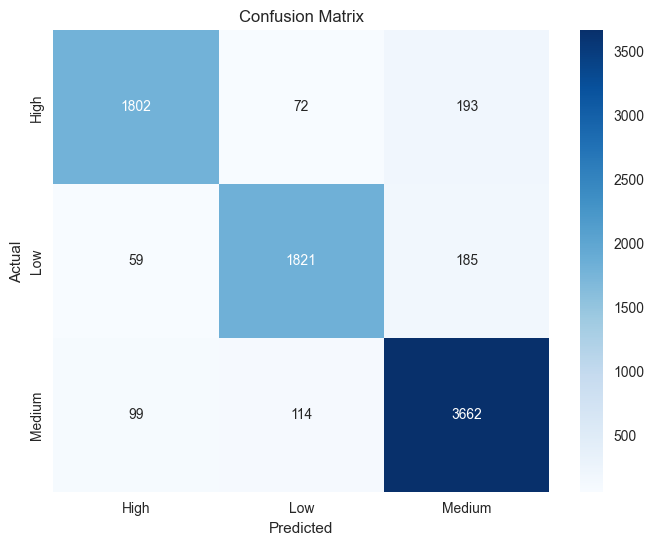

In [9]:
# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance Ranking:
                      feature  importance
3             SessionsPerWeek    0.419871
4   AvgSessionDurationMinutes    0.310380
1               PlayTimeHours    0.057187
5                 PlayerLevel    0.056206
6        AchievementsUnlocked    0.051251
0                         Age    0.041923
9           GameGenre_encoded    0.020020
8            Location_encoded    0.015778
10     GameDifficulty_encoded    0.012719
7              Gender_encoded    0.008067
2             InGamePurchases    0.006598


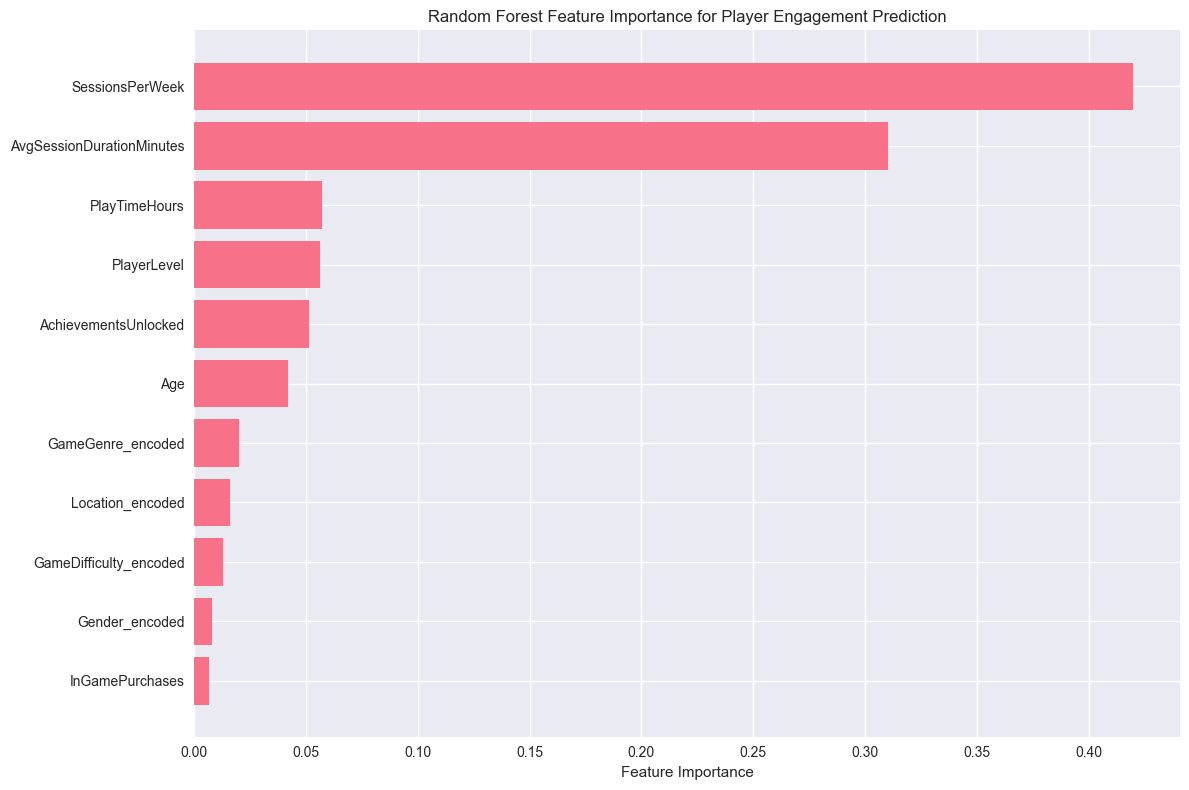


Top 5 Most Important Features:
1. SessionsPerWeek: 0.4199
2. AvgSessionDurationMinutes: 0.3104
3. PlayTimeHours: 0.0572
4. PlayerLevel: 0.0562
5. AchievementsUnlocked: 0.0513


In [10]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Player Engagement Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 5 most important features
print(f"\nTop 5 Most Important Features:")
for i, (feature, importance) in enumerate(feature_importance.head().values, 1):
    print(f"{i}. {feature}: {importance:.4f}")


In [11]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,  # Using 3-fold CV to reduce computation time
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Improved model accuracy: {accuracy_best:.4f}")
print(f"Improvement: {accuracy_best - accuracy:.4f}")


Performing hyperparameter tuning...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9109
Improved model accuracy: 0.9092
Improvement: -0.0006


In [12]:
# Advanced Analytics for Gaming Insights

# 1. Player Segmentation Analysis
print("=== PLAYER SEGMENTATION ANALYSIS ===")
segmentation = df.groupby(['EngagementLevel', 'GameGenre']).agg({
    'Age': 'mean',
    'PlayTimeHours': 'mean',
    'SessionsPerWeek': 'mean',
    'PlayerLevel': 'mean',
    'InGamePurchases': 'sum'
}).round(2)

print("Player characteristics by engagement level and game genre:")
print(segmentation)

# 2. Engagement Pattern Analysis
print("\n=== ENGAGEMENT PATTERN ANALYSIS ===")
high_engagement = df[df['EngagementLevel'] == 'High']
medium_engagement = df[df['EngagementLevel'] == 'Medium']
low_engagement = df[df['EngagementLevel'] == 'Low']

print(f"High Engagement Players ({len(high_engagement)} players):")
print(f"  - Average Play Time: {high_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {high_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {high_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(high_engagement['InGamePurchases'].sum() / len(high_engagement) * 100):.1f}%")

print(f"\nMedium Engagement Players ({len(medium_engagement)} players):")
print(f"  - Average Play Time: {medium_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {medium_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {medium_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(medium_engagement['InGamePurchases'].sum() / len(medium_engagement) * 100):.1f}%")

print(f"\nLow Engagement Players ({len(low_engagement)} players):")
print(f"  - Average Play Time: {low_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {low_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {low_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(low_engagement['InGamePurchases'].sum() / len(low_engagement) * 100):.1f}%")


=== PLAYER SEGMENTATION ANALYSIS ===
Player characteristics by engagement level and game genre:
                              Age  PlayTimeHours  SessionsPerWeek  \
EngagementLevel GameGenre                                           
High            Action      32.22          12.17            14.16   
                RPG         31.76          11.75            14.30   
                Simulation  31.81          11.84            14.20   
                Sports      32.15          12.26            14.29   
                Strategy    31.67          12.31            14.32   
Low             Action      31.69          12.35             4.55   
                RPG         31.73          12.17             4.45   
                Simulation  32.08          12.05             4.49   
                Sports      31.95          12.11             4.62   
                Strategy    32.04          11.83             4.54   
Medium          Action      31.95          12.06             9.59   
       

In [13]:
# 3. Business Recommendations Based on Model Insights
print("\n=== BUSINESS RECOMMENDATIONS ===")

# Based on feature importance analysis
top_features = feature_importance.head(3)['feature'].tolist()
print("Based on our Random Forest analysis, the top factors affecting player engagement are:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print("\n--- STRATEGIC RECOMMENDATIONS ---")

print("\n1. PLAYER RETENTION STRATEGIES:")
print("   • Focus on increasing sessions per week for medium/low engagement players")
print("   • Develop achievement systems to boost player progression")
print("   • Create personalized content based on play time patterns")

print("\n2. GAME DESIGN OPTIMIZATION:")
print("   • Balance game difficulty to maintain engagement across all skill levels")
print("   • Design genre-specific engagement mechanics")
print("   • Implement adaptive session duration recommendations")

print("\n3. MONETIZATION STRATEGIES:")
print("   • Target high-engagement players with premium content")
print("   • Create value propositions for medium-engagement players")
print("   • Design re-engagement campaigns for low-engagement segments")

print("\n4. MARKETING STRATEGIES:")
print("   • Segment campaigns by engagement level and game genre")
print("   • Focus acquisition on demographics showing high engagement patterns")
print("   • Develop retention campaigns for at-risk player segments")

# Risk Analysis
print("\n--- PLAYER CHURN RISK ANALYSIS ---")
risk_indicators = df[(df['SessionsPerWeek'] < 3) & (df['PlayTimeHours'] < 10)]
print(f"Players at high churn risk: {len(risk_indicators)} ({len(risk_indicators)/len(df)*100:.1f}% of total)")
print("Characteristics of at-risk players:")
print(risk_indicators.groupby('GameGenre')['EngagementLevel'].value_counts())



=== BUSINESS RECOMMENDATIONS ===
Based on our Random Forest analysis, the top factors affecting player engagement are:
1. SessionsPerWeek
2. AvgSessionDurationMinutes
3. PlayTimeHours

--- STRATEGIC RECOMMENDATIONS ---

1. PLAYER RETENTION STRATEGIES:
   • Focus on increasing sessions per week for medium/low engagement players
   • Develop achievement systems to boost player progression
   • Create personalized content based on play time patterns

2. GAME DESIGN OPTIMIZATION:
   • Balance game difficulty to maintain engagement across all skill levels
   • Design genre-specific engagement mechanics
   • Implement adaptive session duration recommendations

3. MONETIZATION STRATEGIES:
   • Target high-engagement players with premium content
   • Create value propositions for medium-engagement players
   • Design re-engagement campaigns for low-engagement segments

4. MARKETING STRATEGIES:
   • Segment campaigns by engagement level and game genre
   • Focus acquisition on demographics sho

In [14]:
def predict_player_engagement(age, play_time_hours, in_game_purchases, sessions_per_week,
                               avg_session_duration, player_level, achievements_unlocked,
                               gender, location, game_genre, game_difficulty):
    """
    Predict player engagement level based on gaming behavior characteristics.
    
    Parameters:
    - age: Player's age
    - play_time_hours: Total hours played
    - in_game_purchases: Number of in-game purchases (0 or 1)
    - sessions_per_week: Average sessions per week
    - avg_session_duration: Average session duration in minutes
    - player_level: Current player level
    - achievements_unlocked: Number of achievements unlocked
    - gender: 'Male' or 'Female'
    - location: 'Asia', 'Europe', 'USA', or 'Other'
    - game_genre: 'Action', 'RPG', 'Simulation', 'Sports', or 'Strategy'
    - game_difficulty: 'Easy', 'Medium', or 'Hard'
    
    Returns:
    - Predicted engagement level and probability
    """
    
    # Encode categorical variables
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    location_encoded = label_encoders['Location'].transform([location])[0]
    genre_encoded = label_encoders['GameGenre'].transform([game_genre])[0]
    difficulty_encoded = label_encoders['GameDifficulty'].transform([game_difficulty])[0]
    
    # Create feature vector
    features = np.array([[age, play_time_hours, in_game_purchases, sessions_per_week,
                         avg_session_duration, player_level, achievements_unlocked,
                         gender_encoded, location_encoded, genre_encoded, difficulty_encoded]])
    
    # Make prediction
    prediction = best_rf.predict(features)[0]
    probability = best_rf.predict_proba(features)[0]
    
    # Convert back to engagement level
    engagement_level = target_encoder.inverse_transform([prediction])[0]
    
    return {
        'predicted_engagement': engagement_level,
        'probabilities': {
            'High': probability[0],
            'Low': probability[1], 
            'Medium': probability[2]
        }
    }

# Example prediction
print("=== EXAMPLE PREDICTION ===")
example_prediction = predict_player_engagement(
    age=25,
    play_time_hours=15.5,
    in_game_purchases=1,
    sessions_per_week=8,
    avg_session_duration=120,
    player_level=45,
    achievements_unlocked=30,
    gender='Male',
    location='USA',
    game_genre='Action',
    game_difficulty='Medium'
)

print(f"Predicted Engagement Level: {example_prediction['predicted_engagement']}")
print("Engagement Probabilities:")
for level, prob in example_prediction['probabilities'].items():
    print(f"  {level}: {prob:.3f}")


=== EXAMPLE PREDICTION ===
Predicted Engagement Level: Medium
Engagement Probabilities:
  High: 0.096
  Low: 0.072
  Medium: 0.832
